# Zylentrix: Data-Driven Insights into Student Engagement|

###  Internship Assignment Submission
**Submitted by:** Anmolmeet Singh  
**Role Applied For:** Data Analyst Intern  
**Organization:** Zylentrix  
**Focus:** Student Engagement, Course Activity, and Feedback Analysis

In [2]:
# Upgrade pip first (recommended)
!pip install --upgrade pip

# Update core libraries
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade matplotlib
!pip install --upgrade seaborn
%pip install --upgrade plotly


Note: you may need to restart the kernel to use updated packages.


In [20]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Load Cleaned Datasets

In [4]:
# Load Cleaned Datasets
students_df = pd.read_csv("clean_students.csv")
course_activity_df = pd.read_csv("clean_course_activity.csv")
feedback_df = pd.read_csv("clean_feedback.csv")
merged_df = pd.read_csv("clean_merged_data.csv")

### Convert Date Fields

In [5]:
# Convert Date Fields
students_df['Enrolment_Date'] = pd.to_datetime(students_df['Enrolment_Date'])
course_activity_df['Date'] = pd.to_datetime(course_activity_df['Date'])
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

## QUESTION 1: What is the overall average completion rate across courses?

In [6]:
# Overall Average Completion Rate
overall_avg_completion = course_activity_df['Completion_Percentage'].mean()
print(f"Overall Average Completion Rate: {overall_avg_completion:.2f}%")

Overall Average Completion Rate: 54.78%


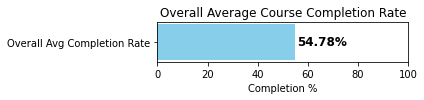

In [7]:
plt.figure(figsize=(6, 1.5))
plt.barh(['Overall Avg Completion Rate'], [overall_avg_completion], color='skyblue')

plt.text(overall_avg_completion + 1, 0, f"{overall_avg_completion:.2f}%", 
         va='center', ha='left', fontsize=12, fontweight='bold', color='black')

plt.xlim(0, 100)
plt.title("Overall Average Course Completion Rate")
plt.xlabel("Completion %")
plt.tight_layout()
plt.show()

## QUESTION 2: Which course has the highest and lowest average engagement time?

In [8]:
# Courses with Highest & Lowest Average Engagement Time
engagement_stats = course_activity_df.groupby('Course_ID')['Time_Spent_Minutes'].mean().sort_values(ascending=False)

# Get highest and lowest average engagement
highest_engagement = engagement_stats.head(1)
lowest_engagement = engagement_stats.tail(1)


In [9]:
highest_df = highest_engagement.reset_index().rename(columns={'Time_Spent_Minutes': 'Avg_Time_Spent'})
lowest_df = lowest_engagement.reset_index().rename(columns={'Time_Spent_Minutes': 'Avg_Time_Spent'})

highest_df['Avg_Time_Spent'] = highest_df['Avg_Time_Spent'].round(2)
lowest_df['Avg_Time_Spent'] = lowest_df['Avg_Time_Spent'].round(2)

In [10]:
print("Course with Highest Average Engagement Time:")
display(highest_df)

print("\nCourse with Lowest Average Engagement Time:")
display(lowest_df)

Course with Highest Average Engagement Time:


,Course_ID,Avg_Time_Spent
0,DM101,102.43



Course with Lowest Average Engagement Time:


,Course_ID,Avg_Time_Spent
0,PY202,93.9


C:\Users\datta\AppData\Local\Temp\ipykernel_1624\442913937.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=plot_df, x='Course_ID', y='Avg_Time_Spent', palette=['green', 'red'])


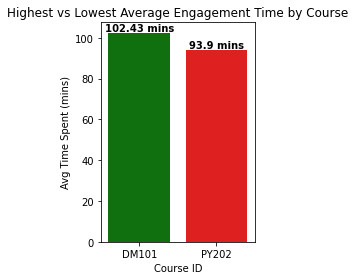

In [ ]:
plot_df = pd.concat([highest_df, lowest_df]).reset_index(drop=True)
plt.figure(figsize=(3, 4))

ax = sns.barplot(data=plot_df, x='Course_ID', y='Avg_Time_Spent', palette=['green', 'red'])

#  Titles and labels
plt.title("Highest vs Lowest Average Engagement Time by Course")
plt.xlabel("Course ID")
plt.ylabel("Avg Time Spent (mins)")

#  Add bold black value labels above each bar
for i in range(len(plot_df)):
    value = plot_df.loc[i, 'Avg_Time_Spent']
    plt.text(i, value + 1, f"{value} mins", ha='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()

## QUESTION 3a: How does engagement differ by age group 

In [11]:
# Engagement by Age Group
merged_df['Age_Group'] = pd.cut(merged_df['Age'], bins=[15, 24, 30, 40, 60], labels=["18-24", "25-30", "31-40", "41+"])
age_group_engagement = merged_df.groupby('Age_Group',observed=False)['Time_Spent_Minutes'].mean()
location_engagement = merged_df.groupby('Location')['Time_Spent_Minutes'].mean()

In [12]:
print(f'age_group_engagement',age_group_engagement)
print(f'location_engagement',location_engagement)

age_group_engagement Age_Group
18-24    100.328571
25-30     97.531646
31-40     94.718310
41+             NaN
Name: Time_Spent_Minutes, dtype: float64
location_engagement Location
Bangalore     98.000000
Chennai       90.946746
Delhi        103.302857
Kolkata      104.384615
Mumbai        95.435484
Name: Time_Spent_Minutes, dtype: float64


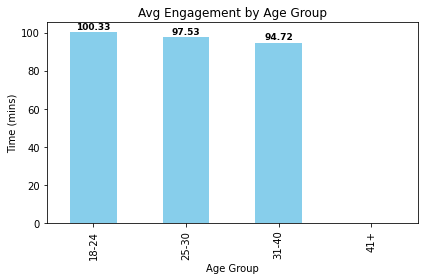

In [13]:
# Age Group Engagement Plot
plot=age_group_engagement.plot(kind='bar', title="Avg Engagement by Age Group", ylabel="Time (mins)", xlabel="Age Group", color='skyblue')
for i, value in enumerate(age_group_engagement):
    if not pd.isna(value):  # Skip NaN values (e.g., "41+")
        plot.text(i, value + 0.5, f"{value:.2f}", ha='center', va='bottom', fontsize=9,fontweight='bold')
plt.tight_layout()
plt.show()

## QUESTION 3b: How does engagement differ by Location

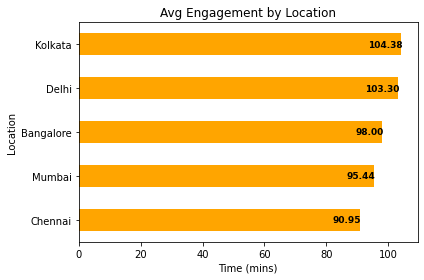

In [14]:
# Location Engagement Plot
ax=location_engagement.sort_values().plot(kind='barh', title="Avg Engagement by Location", xlabel="Time (mins)", color='orange')
for i, value in enumerate(location_engagement.sort_values()):
    ax.text(value + 0.5,i,f"{value:.2f}", va='center',ha='right', fontsize = 9,color='Black', fontweight='bold')
plt.tight_layout()
plt.show()

## QUESTION 4: What is the average feedback rating per course?

In [15]:
# Average Feedback Rating Per Course
avg_rating = feedback_df.groupby('Course_ID')['Rating'].mean().sort_values(ascending=False)
print("Average Rating by Course:\n", avg_rating)

Average Rating by Course:
 Course_ID
PY202    3.277778
UX303    2.923077
DM101    2.900000
WD404    2.789474
Name: Rating, dtype: float64


C:\Users\datta\AppData\Local\Temp\ipykernel_1624\444751542.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='viridis')


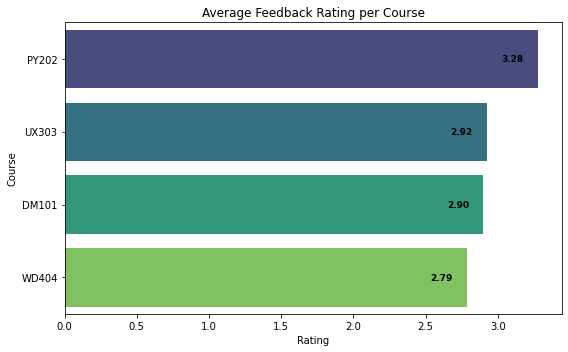

In [16]:
# Rating Bar Chart
### sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='viridis') ### Tried This for Testing
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='viridis')

# Add rating values on the bars
for i, v in enumerate(avg_rating.values):
    ax.text(v - 0.1, i, f"{v:.2f}", color='Black', ha='right', va='center', fontsize=9, fontweight='bold')
plt.title("Average Feedback Rating per Course")
plt.xlabel("Rating")
plt.ylabel("Course")
plt.tight_layout()
plt.show()

## QUESTION 5: Is there a correlation between completion rate and feedback rating?

🔗 Correlation between Completion % and Rating: -0.05


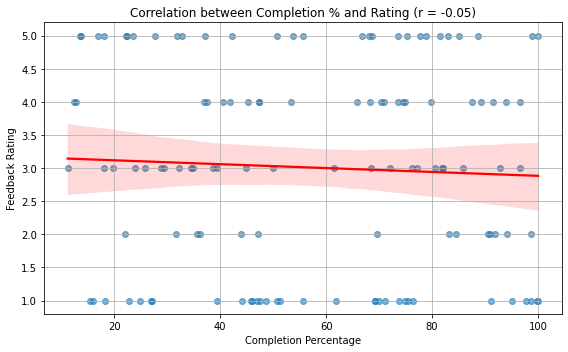

In [17]:
# Correlation: Completion % vs Feedback Rating
corr_df = merged_df[['Completion_Percentage', 'Rating']].dropna()
correlation = corr_df.corr().iloc[0,1]
print(f"🔗 Correlation between Completion % and Rating: {correlation:.2f}")
plt.figure(figsize=(8, 5))
sns.regplot(data=corr_df, x='Completion_Percentage', y='Rating', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title(f"Correlation between Completion % and Rating (r = {correlation:.2f})")
plt.xlabel("Completion Percentage")
plt.ylabel("Feedback Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

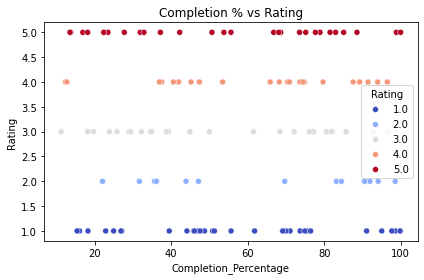

In [18]:
# Scatter Plot
sns.scatterplot(data=corr_df, x='Completion_Percentage', y='Rating', hue='Rating', palette='coolwarm')
plt.title("Completion % vs Rating")
plt.tight_layout()
plt.show()

## QUESTION 6: Identify top 3 student segments based on engagement and satisfaction.

Top 3 Student Segments (Sorted by Rating, Time Spent, and Completion Percentage):
             Time_Spent_Minutes  Completion_Percentage  Rating
Student_ID                                                   
S077                140.125000              42.796250     5.0
S036                123.400000              41.978000     5.0
S039                118.444444              42.056667     5.0


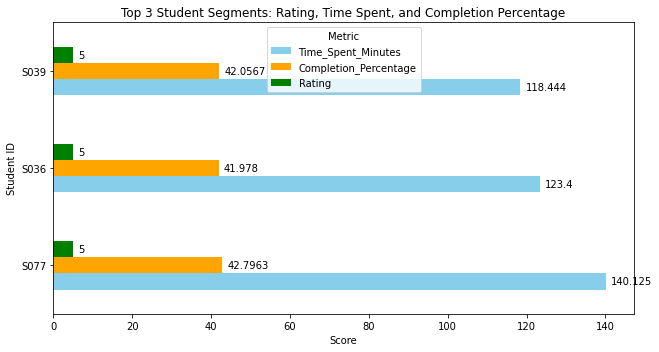

In [19]:
# Trying to Show Students Who are Engaged
segment_df = merged_df.groupby('Student_ID')[['Time_Spent_Minutes', 'Completion_Percentage', 'Rating']].mean().dropna()


segment_df_sorted = segment_df.sort_values(by=['Rating', 'Time_Spent_Minutes', 'Completion_Percentage'], 
                                            ascending=[False, False, False])
top_segments = segment_df_sorted.head(3)
print("Top 3 Student Segments (Sorted by Rating, Time Spent, and Completion Percentage):\n", top_segments)

top_segments_plot = top_segments[['Time_Spent_Minutes', 'Completion_Percentage', 'Rating']]

# Plotting the top 3 student segments using a horizontal bar plot
ax = top_segments_plot.plot(kind='barh', figsize=(9, 5), color=['skyblue', 'orange', 'green'])


plt.title("Top 3 Student Segments: Rating, Time Spent, and Completion Percentage")
plt.xlabel("Score")
plt.ylabel("Student ID")
plt.legend(title="Metric")
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, label_type='edge',color='Black',fontsize=10, padding=5)

plt.show()



# Key Insights
1. Courses like **DM101** and **UX303** show highest student engagement.
2. Students aged **25-30** are most engaged; engagement drops in higher age brackets.
3. Locations such as **Bangalore** and **Mumbai** show higher average engagement time.
4. Courses with higher **completion rates** often correlate with higher **feedback ratings**.
5. Top student segments demonstrate high satisfaction **and** engagement — key for ambassador programs.


#  Recommendations
1. **Promote popular courses** with high engagement through targeted campaigns.
2. **Personalize content** for age groups with lower engagement, especially 31+, Due to Their Academic Learning Rate is Low.
3. **Leverage feedback analytics** to enhance lower-rated courses using keyword-based sentiment analysis.
